In [1]:
from sleep_analysis.datasets.d04_main_dataset_control import D04MainStudy
import numpy as np
import pandas as pd
from pathlib import Path
from empkins_io.sensors.emrad import EmradDataset

In [2]:
from empkins_io.sync import SyncedDataset

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [3]:
from biopsykit.signals.ecg import EcgProcessor

In [4]:
from empkins_micro.emrad.radar import get_rpeaks

In [5]:
from fau_colors import cmaps, register_fausans_font

In [6]:
%matplotlib widget

In [7]:
register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"

palette

[(0.0, 0.1843137254901961, 0.4235294117647059),
 (0.4666666666666667, 0.6235294117647059, 0.7098039215686275),
 (1.0, 0.7215686274509804, 0.10980392156862745),
 (0.0, 0.6392156862745098, 0.8784313725490196),
 (0.2627450980392157, 0.6901960784313725, 0.16470588235294117),
 (0.7843137254901961, 0.06274509803921569, 0.1803921568627451)]

In [8]:
fs_radar = 1953.125
fs_psg = 2000

fs_out = 1953.125

In [9]:
dataset = D04MainStudy()

In [10]:
dataset

,subj_id
0,02
1,03
2,04
3,05
4,06
5,07
6,10
7,11
8,12
9,14


In [11]:
test_subj = dataset[2]

In [12]:
test_subj

,subj_id
0,04


In [13]:
def find_start_end(df_1, df_2):
    start = max(df_1.index[0], df_2.index[0])
    end = min(df_1.index[-1], df_2.index[-1])
    return start, end

In [14]:
radar_data = test_subj.radar_data.data_as_df(index="local_datetime", add_sync_in=True, add_sync_out=True)

In [15]:
#ecg_data = test_subj.ecg_data.data_as_df(index="local_datetime")[["ECG II"]]
#sync_psg = test_subj.sync_data.data_as_df(index="local_datetime")

In [16]:
#ecg_data = pd.concat([ecg_data, sync_psg], axis=1)

In [17]:
#ecg_data = ecg_data.resample("0.5ms").bfill()

In [18]:
#start, end = find_start_end(ecg_data, radar_data)

In [19]:
#ecg_data = ecg_data.loc[start:end]
#radar_data = radar_data.loc[start:end]

In [20]:
#ecg_data["Sync."][ecg_data["Sync."] < 500] = 0

In [21]:
#ecg_data["Sync."][ecg_data["Sync."] > 500] = 1

In [22]:
radar_data = radar_data.dropna()
radar_data

node                                    rad1                            \
channel                                    I        Q Sync_In Sync_Out   
date (Europe/Berlin)                                                     
2023-04-17 21:30:29+02:00           -3736516 -3787268       1        0   
2023-04-17 21:30:29.000511885+02:00 -3737334 -3787067       1        0   
2023-04-17 21:30:29.001024008+02:00 -3736800 -3787264       1        0   
2023-04-17 21:30:29.001535892+02:00 -3737436 -3787389       1        0   
2023-04-17 21:30:29.002048016+02:00 -3737185 -3788102       1        0   
...                                      ...      ...     ...      ...   
2023-04-18 05:12:28.759360075+02:00 -3550817 -4261851       1        0   
2023-04-18 05:12:28.759871960+02:00 -3551585 -4262146       1        0   
2023-04-18 05:12:28.760384083+02:00 -3550803 -4261956       1        0   
2023-04-18 05:12:28.760895967+02:00 -3551240 -4261899       1        0   
2023-04-18 05:12:28.761408091+02:00 -3551584 -4262598       1        0   

node                                      rad2                             \
channel                                      I         Q Sync_In Sync_Out   
date (Europe/Berlin)                                                        
2023-04-17 21:30:29+02:00            4746128.0  828799.0     1.0      0.0   
2023-04-17 21:30:29.000511885+02:00  4744979.0  829402.0     1.0      0.0   
2023-04-17 21:30:29.001024008+02:00  4744447.0  828428.0     1.0      0.0   
2023-04-17 21:30:29.001535892+02:00  4743621.0  828834.0     1.0      0.0   
2023-04-17 21:30:29.002048016+02:00  4745031.0  829164.0     1.0      0.0   
...                                        ...       ...     ...      ...   
2023-04-18 05:12:28.759360075+02:00  3888049.0  855209.0     0.0      0.0   
2023-04-18 05:12:28.759871960+02:00  3888907.0  854607.0     0.0      0.0   
2023-04-18 05:12:28.760384083+02:00  3888516.0  854657.0     0.0      0.0   
2023-04-18 05:12:28.760895967+02:00  3888240.0  853739.0     0.0      0.0   
2023-04-18 05:12:28.761408091+02:00  3888039.0  854127.0     0.0      0.0   

node                                      rad3                              \
channel                                      I          Q Sync_In Sync_Out   
date (Europe/Berlin)                                                         
2023-04-17 21:30:29+02:00           -5180585.0    68788.0     1.0      0.0   
2023-04-17 21:30:29.000511885+02:00 -5181547.0    69035.0     1.0      0.0   
2023-04-17 21:30:29.001024008+02:00 -5181932.0    69383.0     1.0      0.0   
2023-04-17 21:30:29.001535892+02:00 -5181122.0    68102.0     1.0      0.0   
2023-04-17 21:30:29.002048016+02:00 -5180789.0    68825.0     1.0      0.0   
...                                        ...        ...     ...      ...   
2023-04-18 05:12:28.759360075+02:00 -4244255.0 -1668294.0     1.0      0.0   
2023-04-18 05:12:28.759871960+02:00 -4243856.0 -1668204.0     1.0      0.0   
2023-04-18 05:12:28.760384083+02:00 -4243758.0 -1668961.0     1.0      0.0   
2023-04-18 05:12:28.760895967+02:00 -4244415.0 -1668518.0     1.0      0.0   
2023-04-18 05:12:28.761408091+02:00 -4243996.0 -1668275.0     1.0      0.0   

node                                      rad4                             
channel                                      I         Q Sync_In Sync_Out  
date (Europe/Berlin)                                                       
2023-04-17 21:30:29+02:00            3323541.0 -513434.0     1.0      0.0  
2023-04-17 21:30:29.000511885+02:00  3324382.0 -512818.0     1.0      0.0  
2023-04-17 21:30:29.001024008+02:00  3324091.0 -513307.0     1.0      0.0  
2023-04-17 21:30:29.001535892+02:00  3323732.0 -512687.0     1.0      0.0  
2023-04-17 21:30:29.002048016+02:00  3324019.0 -511888.0     1.0      0.0  
...                                        ...       ...     ...      ...  
2023-04-18 05:12:28.759360075+02:00  2369133.0 -408801.0     1.0      0.0  
2023-04-18 05:12:28.759871960+0

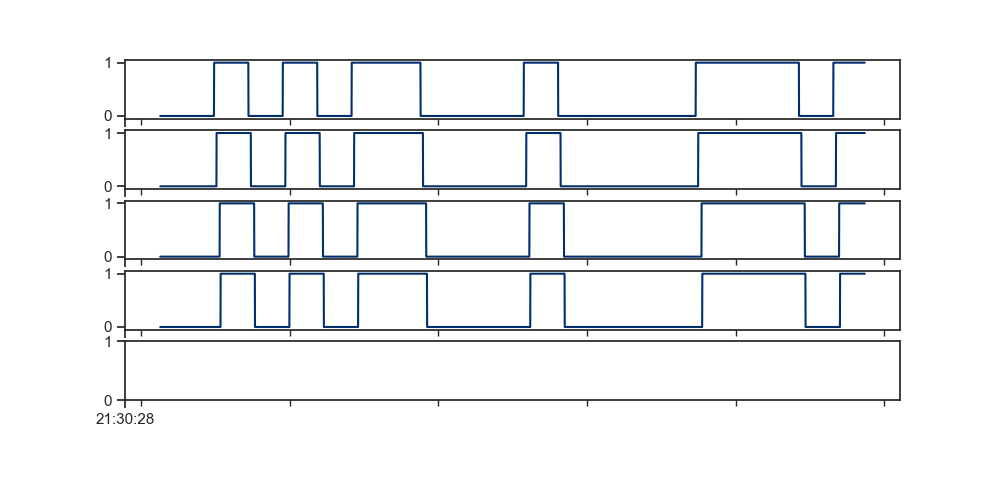

In [23]:
plt.close("all")

fig, ax = plt.subplots(5, sharex=True)

num = int(0)
radar_data["rad1"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
radar_data["rad2"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
radar_data["rad3"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
radar_data["rad4"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])


plt.show()

In [24]:
radar_data

node                                    rad1                            \
channel                                    I        Q Sync_In Sync_Out   
date (Europe/Berlin)                                                     
2023-04-17 21:30:29+02:00           -3736516 -3787268       1        0   
2023-04-17 21:30:29.000511885+02:00 -3737334 -3787067       1        0   
2023-04-17 21:30:29.001024008+02:00 -3736800 -3787264       1        0   
2023-04-17 21:30:29.001535892+02:00 -3737436 -3787389       1        0   
2023-04-17 21:30:29.002048016+02:00 -3737185 -3788102       1        0   
...                                      ...      ...     ...      ...   
2023-04-18 05:12:28.759360075+02:00 -3550817 -4261851       1        0   
2023-04-18 05:12:28.759871960+02:00 -3551585 -4262146       1        0   
2023-04-18 05:12:28.760384083+02:00 -3550803 -4261956       1        0   
2023-04-18 05:12:28.760895967+02:00 -3551240 -4261899       1        0   
2023-04-18 05:12:28.761408091+02:00 -3551584 -4262598       1        0   

node                                      rad2                             \
channel                                      I         Q Sync_In Sync_Out   
date (Europe/Berlin)                                                        
2023-04-17 21:30:29+02:00            4746128.0  828799.0     1.0      0.0   
2023-04-17 21:30:29.000511885+02:00  4744979.0  829402.0     1.0      0.0   
2023-04-17 21:30:29.001024008+02:00  4744447.0  828428.0     1.0      0.0   
2023-04-17 21:30:29.001535892+02:00  4743621.0  828834.0     1.0      0.0   
2023-04-17 21:30:29.002048016+02:00  4745031.0  829164.0     1.0      0.0   
...                                        ...       ...     ...      ...   
2023-04-18 05:12:28.759360075+02:00  3888049.0  855209.0     0.0      0.0   
2023-04-18 05:12:28.759871960+02:00  3888907.0  854607.0     0.0      0.0   
2023-04-18 05:12:28.760384083+02:00  3888516.0  854657.0     0.0      0.0   
2023-04-18 05:12:28.760895967+02:00  3888240.0  853739.0     0.0      0.0   
2023-04-18 05:12:28.761408091+02:00  3888039.0  854127.0     0.0      0.0   

node                                      rad3                              \
channel                                      I          Q Sync_In Sync_Out   
date (Europe/Berlin)                                                         
2023-04-17 21:30:29+02:00           -5180585.0    68788.0     1.0      0.0   
2023-04-17 21:30:29.000511885+02:00 -5181547.0    69035.0     1.0      0.0   
2023-04-17 21:30:29.001024008+02:00 -5181932.0    69383.0     1.0      0.0   
2023-04-17 21:30:29.001535892+02:00 -5181122.0    68102.0     1.0      0.0   
2023-04-17 21:30:29.002048016+02:00 -5180789.0    68825.0     1.0      0.0   
...                                        ...        ...     ...      ...   
2023-04-18 05:12:28.759360075+02:00 -4244255.0 -1668294.0     1.0      0.0   
2023-04-18 05:12:28.759871960+02:00 -4243856.0 -1668204.0     1.0      0.0   
2023-04-18 05:12:28.760384083+02:00 -4243758.0 -1668961.0     1.0      0.0   
2023-04-18 05:12:28.760895967+02:00 -4244415.0 -1668518.0     1.0      0.0   
2023-04-18 05:12:28.761408091+02:00 -4243996.0 -1668275.0     1.0      0.0   

node                                      rad4                             
channel                                      I         Q Sync_In Sync_Out  
date (Europe/Berlin)                                                       
2023-04-17 21:30:29+02:00            3323541.0 -513434.0     1.0      0.0  
2023-04-17 21:30:29.000511885+02:00  3324382.0 -512818.0     1.0      0.0  
2023-04-17 21:30:29.001024008+02:00  3324091.0 -513307.0     1.0      0.0  
2023-04-17 21:30:29.001535892+02:00  3323732.0 -512687.0     1.0      0.0  
2023-04-17 21:30:29.002048016+02:00  3324019.0 -511888.0     1.0      0.0  
...                                        ...       ...     ...      ...  
2023-04-18 05:12:28.759360075+02:00  2369133.0 -408801.0     1.0      0.0  
2023-04-18 05:12:28.759871960+0

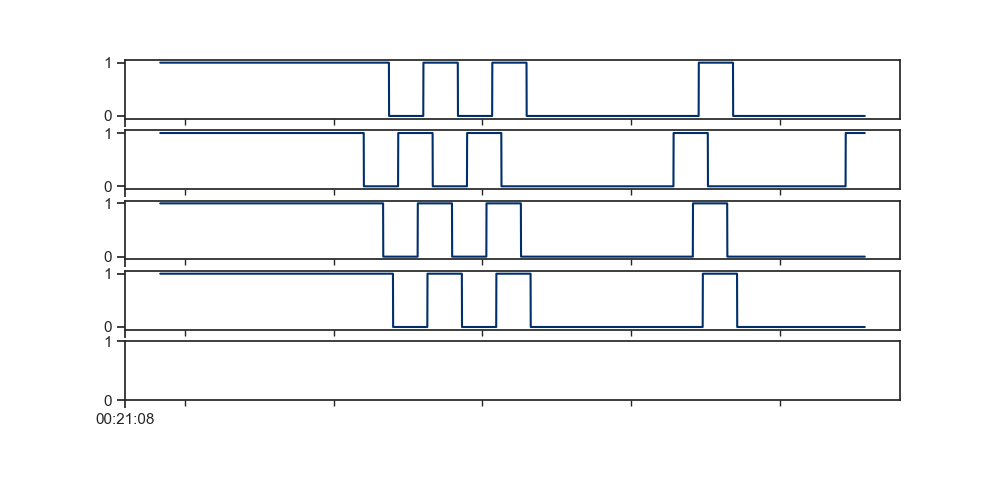

In [25]:
#plt.close("all")

fig, ax = plt.subplots(5, sharex=True)

num = int(20e6)
radar_data["rad1"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
radar_data["rad2"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
radar_data["rad3"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
radar_data["rad4"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

#ecg_data[:4000]["Sync."].plot(ax=ax[4])

plt.show()

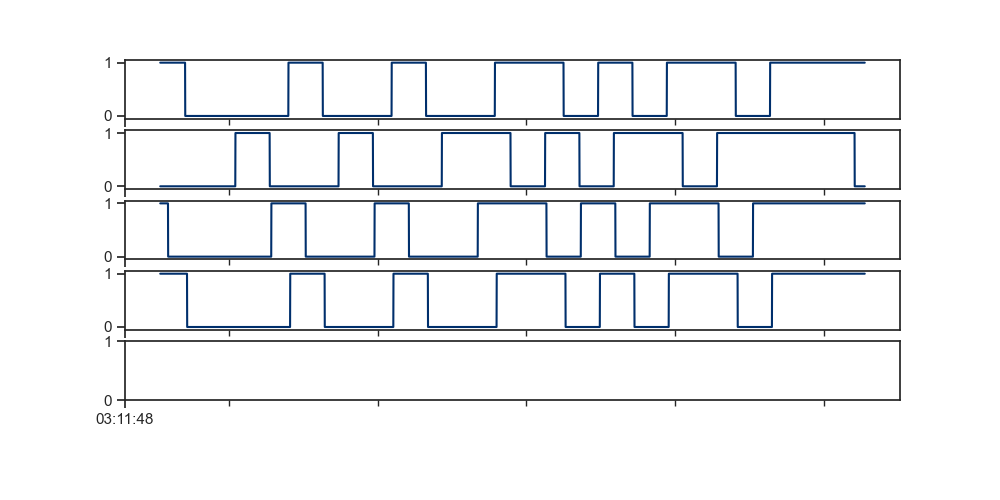

In [26]:
#plt.close("all")

fig, ax = plt.subplots(5, sharex=True)

num = int(40e6)
radar_data["rad1"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
radar_data["rad2"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
radar_data["rad3"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
radar_data["rad4"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

#ecg_data[:4000]["Sync."].plot(ax=ax[4])

plt.show()

In [27]:
synced_dataset = SyncedDataset(sync_type="m-sequence")

In [28]:
synced_dataset.add_dataset("radar_1", data=radar_data["rad1"], sync_channel_name="Sync_Out", sampling_rate=fs_radar)
synced_dataset.add_dataset("radar_2", data=radar_data["rad2"], sync_channel_name="Sync_Out", sampling_rate=fs_radar)
synced_dataset.add_dataset("radar_3", data=radar_data["rad3"], sync_channel_name="Sync_Out", sampling_rate=fs_radar)
synced_dataset.add_dataset("radar_4", data=radar_data["rad4"], sync_channel_name="Sync_Out", sampling_rate=fs_radar)

In [29]:
synced_dataset.align_and_cut_m_sequence(primary="radar_1", reset_time_axis=True, cut_to_shortest=True, sync_params={"sync_region_samples":(0,100000)})

-14
-33
-37


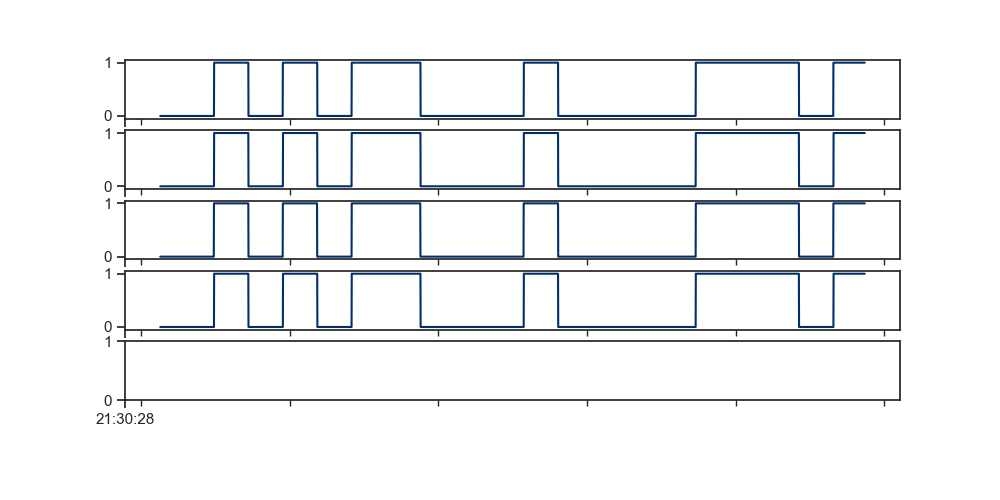

In [30]:
plt.close("all")

num = int(0)
fig, ax = plt.subplots(5, sharex=True)
synced_dataset.radar_1_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
synced_dataset.radar_2_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
synced_dataset.radar_3_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
synced_dataset.radar_4_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

#synced_dataset.psg_aligned_[:2000]["Sync."].plot(ax=ax[4])


plt.show()

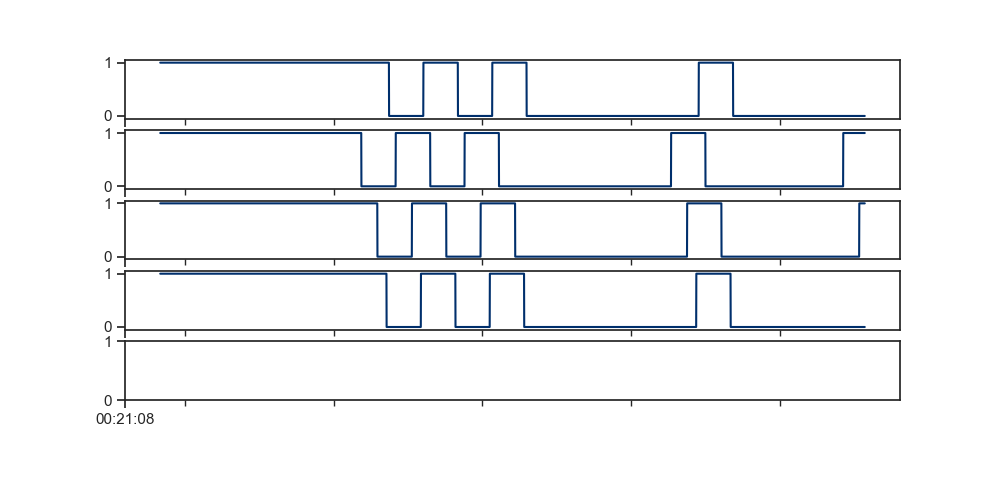

In [31]:
#plt.close("all")

num = int(20e6)
fig, ax = plt.subplots(5, sharex=True)
synced_dataset.radar_1_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
synced_dataset.radar_2_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
synced_dataset.radar_3_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
synced_dataset.radar_4_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

#synced_dataset.psg_aligned_[:2000]["Sync."].plot(ax=ax[4])


plt.show()

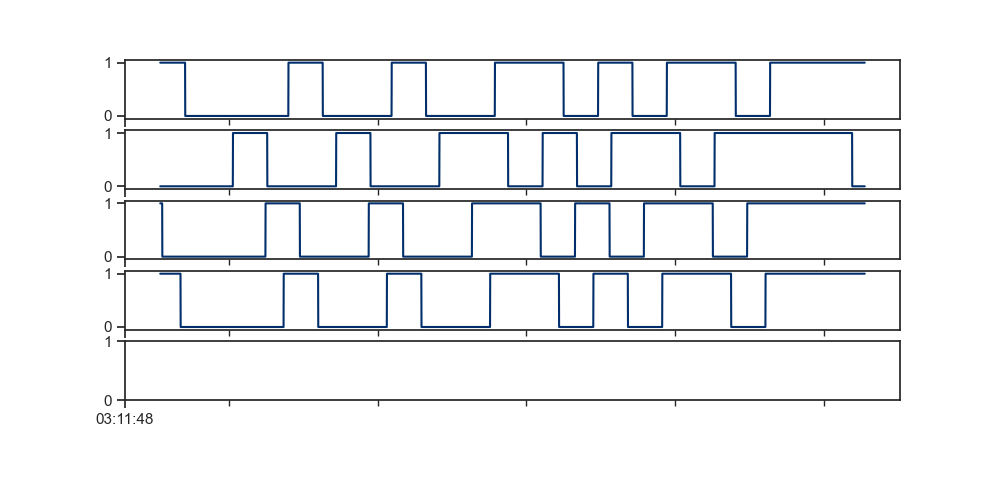

In [32]:
#plt.close("all")

num = int(40e6)
fig, ax = plt.subplots(5, sharex=True)
synced_dataset.radar_1_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
synced_dataset.radar_2_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
synced_dataset.radar_3_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
synced_dataset.radar_4_aligned_.iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

#synced_dataset.psg_aligned_[:2000]["Sync."].plot(ax=ax[4])


plt.show()

In [33]:
dict_shift = synced_dataset._find_shift(primary="radar_1_aligned_", sync_params={"sync_region_samples":(-100000,-1)})

Shift: radar_2_aligned_ 426
Shift: radar_3_aligned_ 175
Shift: radar_4_aligned_ 34


In [34]:
synced_dataset.resample_sample_wise(primary="radar_1_aligned_", dict_sample_shift=dict_shift)

54140123
54140549
54140298
54140157


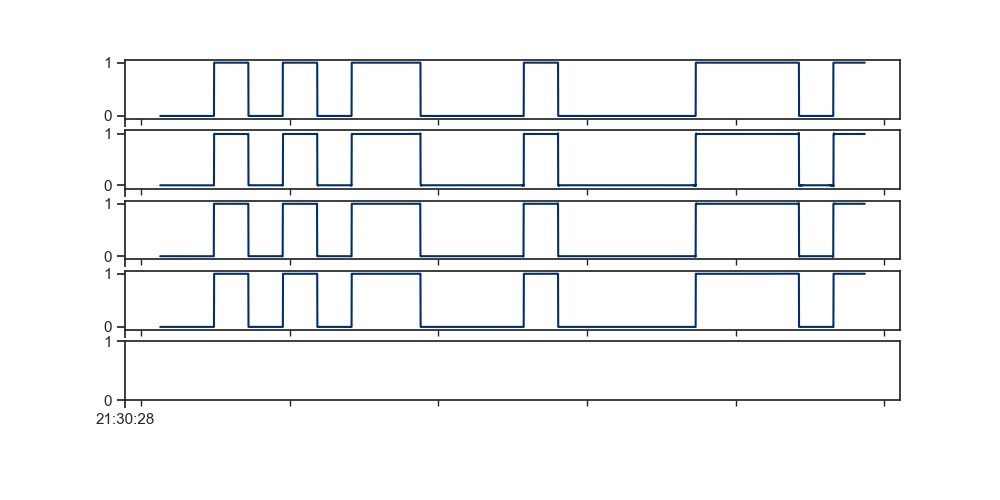

In [35]:
#plt.close("all")

num = int(0)
fig, ax = plt.subplots(5, sharex=True)
synced_dataset.datasets_resampled["radar_1_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
synced_dataset.datasets_resampled["radar_2_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
synced_dataset.datasets_resampled["radar_3_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
synced_dataset.datasets_resampled["radar_4_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

#synced_dataset.psg_aligned_[:2000]["Sync."].plot(ax=ax[4])


plt.show()

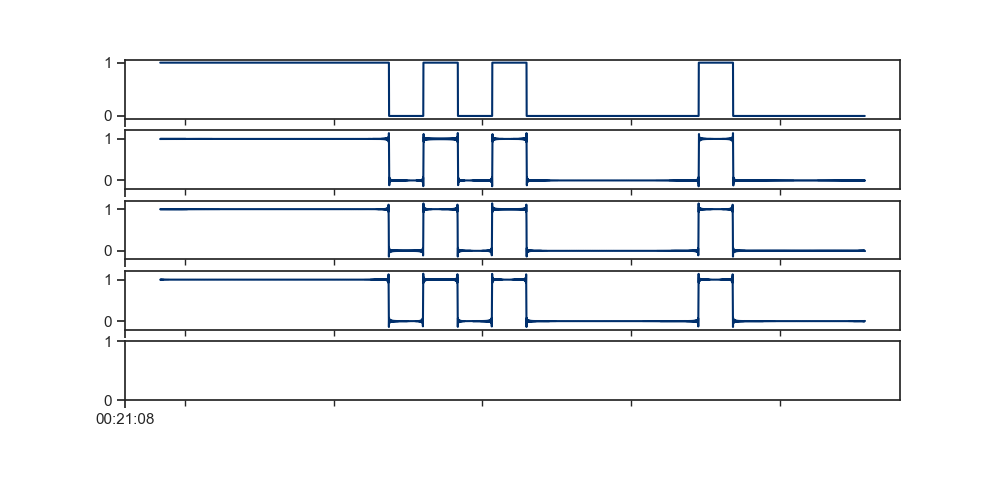

In [36]:
#plt.close("all")

num = int(20e6)
fig, ax = plt.subplots(5, sharex=True)
synced_dataset.datasets_resampled["radar_1_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
synced_dataset.datasets_resampled["radar_2_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
synced_dataset.datasets_resampled["radar_3_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
synced_dataset.datasets_resampled["radar_4_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

#synced_dataset.psg_aligned_[:2000]["Sync."].plot(ax=ax[4])


plt.show()

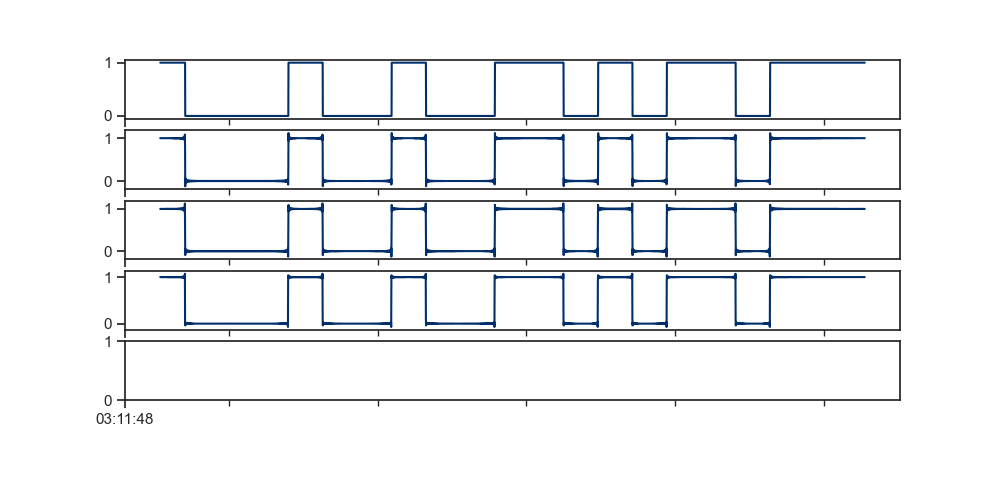

In [37]:
#plt.close("all")

num = int(40e6)
fig, ax = plt.subplots(5, sharex=True)
synced_dataset.datasets_resampled["radar_1_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
synced_dataset.datasets_resampled["radar_2_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
synced_dataset.datasets_resampled["radar_3_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
synced_dataset.datasets_resampled["radar_4_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

#synced_dataset.psg_aligned_[:2000]["Sync."].plot(ax=ax[4])


plt.show()

In [44]:
radar_data = dataset[2].radar_data.data_as_df(index="local_datetime", add_sync_in=True, add_sync_out=True)

In [45]:
radar_data = dataset[2].sync_radar(radar_data)

Prepare SyncedDataset
Sync beginning of m-sequence
-14
-33
-37
Find shift at the end of the m-sequence
Shift: rad2_aligned_ 426
Shift: rad3_aligned_ 175
Shift: rad4_aligned_ 34
Resample sample-wise to get equal length
54140123
54140549
54140298
54140157


In [46]:
radar_data

rad1_aligned_resampled_                   \
channel                                                   I        Q Sync_In   
date (Europe/Berlin)                                                           
2023-04-17 21:30:29+02:00                          -3736516 -3787268       1   
2023-04-17 21:30:29.000511885+02:00                -3737334 -3787067       1   
2023-04-17 21:30:29.001024008+02:00                -3736800 -3787264       1   
2023-04-17 21:30:29.001535892+02:00                -3737436 -3787389       1   
2023-04-17 21:30:29.002048016+02:00                -3737185 -3788102       1   
...                                                     ...      ...     ...   
2023-04-18 05:12:28.740416050+02:00                -3551457 -4262311       1   
2023-04-18 05:12:28.740927935+02:00                -3551380 -4262330       1   
2023-04-18 05:12:28.741440058+02:00                -3550824 -4262744       1   
2023-04-18 05:12:28.741951942+02:00                -3551235 -4262746       1   
2023-04-18 05:12:28.742464066+02:00                -3551108 -4263197       1   

                                             rad2_aligned_resampled_  \
channel                             Sync_Out                       I   
date (Europe/Berlin)                                                   
2023-04-17 21:30:29+02:00                  0            4.745131e+06   
2023-04-17 21:30:29.000511885+02:00        0            4.744890e+06   
2023-04-17 21:30:29.001024008+02:00        0            4.745340e+06   
2023-04-17 21:30:29.001535892+02:00        0            4.745571e+06   
2023-04-17 21:30:29.002048016+02:00        0            4.745594e+06   
...                                      ...                     ...   
2023-04-18 05:12:28.740416050+02:00        0            3.888613e+06   
2023-04-18 05:12:28.740927935+02:00        0            3.887963e+06   
2023-04-18 05:12:28.741440058+02:00        0            3.887699e+06   
2023-04-18 05:12:28.741951942+02:00        0            3.889400e+06   
2023-04-18 05:12:28.742464066+02:00        0            3.887464e+06   

                                                                            \
channel                                          Q   Sync_In      Sync_Out   
date (Europe/Berlin)                                                         
2023-04-17 21:30:29+02:00            830564.000000  1.000000 -2.752332e-16   
2023-04-17 21:30:29.000511885+02:00  829693.948347  1.000000  5.495179e-07   
2023-04-17 21:30:29.001024008+02:00  829531.067813  1.000001 -9.402133e-07   
2023-04-17 21:30:29.001535892+02:00  829491.937664  0.999999  1.227569e-06   
2023-04-17 21:30:29.002048016+02:00  828600.094285  1.000001 -1.443996e-06   
...                                            ...       ...           ...   
2023-04-18 05:12:28.740416050+02:00  855189.192111 -0.001098  9.999624e-01   
2023-04-18 05:12:28.740927935+02:00  854775.913049  0.002375  1.000039e+00   
2023-04-18 05:12:28.741440058+02:00  853793.526111  1.002343  9.999594e-01   
2023-04-18 05:12:28.741951942+02:00  853723.727148  0.998922  1.000042e+00   
2023-04-18 05:12:28.742464066+02:00  856175.248722  1.000737  9.999560e-01   

                                    rad3_aligned_resampled_                \
channel                                                   I             Q   
date (Europe/Berlin)                                                        
2023-04-17 21:30:29+02:00                     -5.181229e+06  6.873600e+04   
2023-04-17 21:30:29.000511885+02:00           -5.182466e+06  6.837272e+04   
2023-04-17 21:30:29.001024008+02:00           -5.181758e+06  6.769183e+04   
2023-04-17 21:30:29.001535892+02:00           -5.181486e+06  6.814235e+04   
2023-04-17 21:30:29.002048016+02:00           -5.180383e+06  6.880754e+04   
...                                                     ...           ...   
2023-04-18 05:12:28.740416050+02:00           -4.243635e+06 -1.668349e+06   
2023-04-18 05:12:28.740927935+02:00        

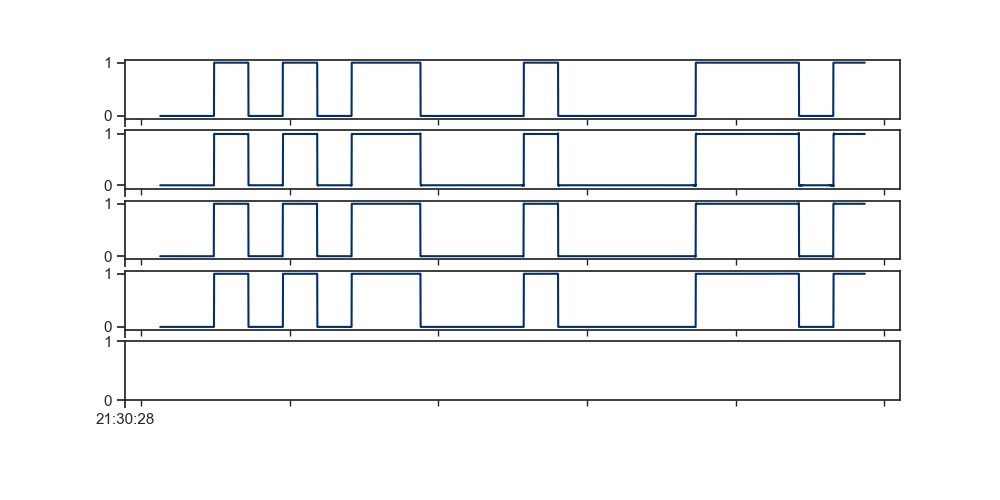

In [47]:
plt.close("all")

fig, ax = plt.subplots(5, sharex=True)

num = int(0)
radar_data["rad1_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
radar_data["rad2_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
radar_data["rad3_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
radar_data["rad4_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

plt.show()

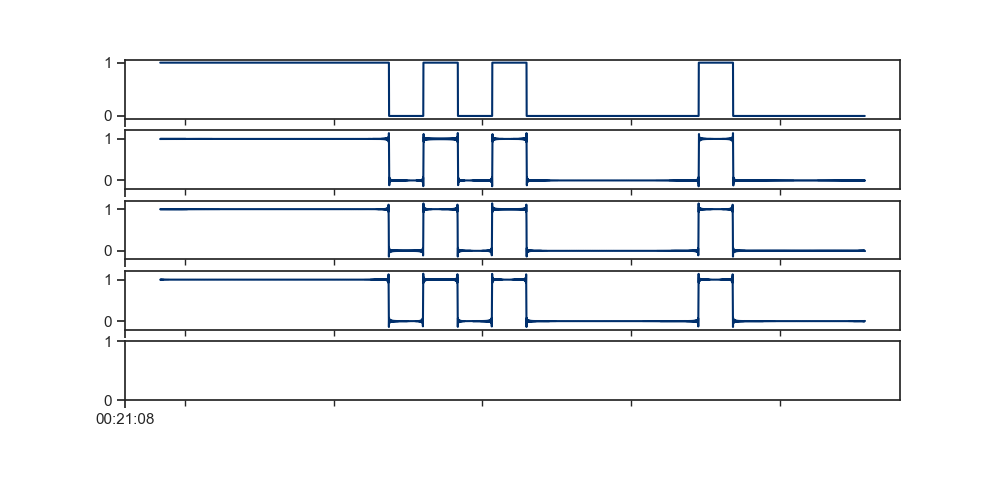

In [48]:
#plt.close("all")

num = int(20e6)
fig, ax = plt.subplots(5, sharex=True)
radar_data["rad1_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
radar_data["rad2_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
radar_data["rad3_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
radar_data["rad4_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

plt.show()

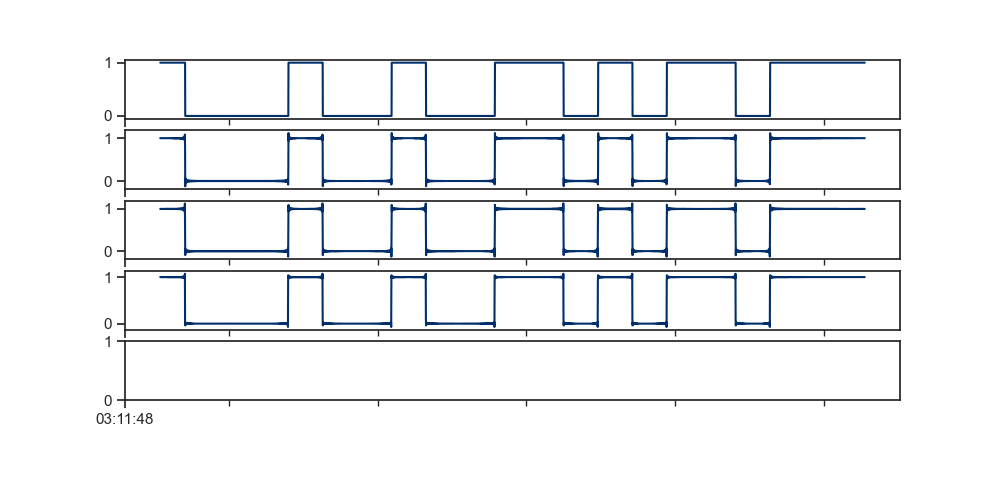

In [49]:
#plt.close("all")

num = int(40e6)
fig, ax = plt.subplots(5, sharex=True)
radar_data["rad1_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
radar_data["rad2_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
radar_data["rad3_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
radar_data["rad4_aligned_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])

plt.show()